In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 17})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (8,4)

times = r"$\times$"
pwr_neg = r"$^{-1}$"
sigma = r"$\sigma_w$"


results_path = "/home/antoniu/Desktop/MFI_git/MFI_master/MFI/results_plot"
path = "/home/antoniu/Desktop/MFI_git/MFI_master/MFI"
os.chdir(path)

from pyMFI import MFI

In [23]:
# #Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS40")

# #Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position40")

# #Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 10, error_pace = 500, WellTempered=1, nhills=13000, periodic=1, FES_cutoff=50)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, ofv_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)


|1300/13000|=> Avr OFE: 29.26 *** |2600/13000|=> Avr OFE: 28.66 *** |3900/13000|=> Avr OFE: 28.68 *** |5200/13000|=> Avr OFE: 28.85 *** |6500/13000|=> Avr OFE: 28.87 *** |7800/13000|=> Avr OFE: 28.89 *** |9100/13000|=> Avr OFE: 28.93 *** |10400/13000|=> Avr OFE: 28.93 *** |11700/13000|=> Avr OFE: 28.98 *** |13000/13000|=> Avr OFE: 29.0 *** 

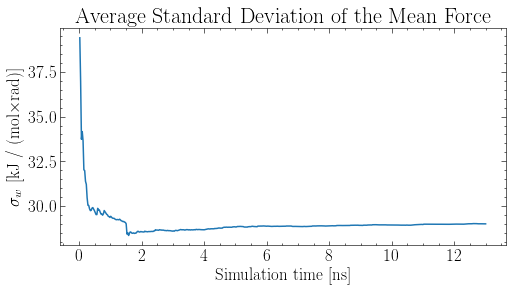

In [24]:
plt.plot([time / 1000 for time in time_history], ofe_history)
plt.ylabel(sigma + ' [kJ / (mol' + times + "rad)]")
plt.xlabel('Simulation time [ns]')
plt.title('Average Standard Deviation of the Mean Force', fontsize=22)
# plt.savefig('/home/antoniu/Desktop/Windows/poster_converge.png', dpi=600, bbox_inches='tight')
plt.show()